### Lab - 5 (17/9/20) Adult Income Dataset - Data Preprocessing

In [74]:
import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from copy import deepcopy as copy 

%matplotlib inline

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [2]:
CURRENT_DIR = os.path.abspath(os.path.dirname(__name__))
DATA_DIR = os.path.join(CURRENT_DIR, 'data')

TRAIN_DATA_FILE = os.path.join(DATA_DIR, 'adult.data')
TEST_DATA_FILE = os.path.join(DATA_DIR, 'adult.test')

In [3]:
df = pd.read_csv('adult.csv')

In [4]:
adult_df = pd.read_csv(r'C:\Users\PREETI\College\DS Lab\Adult Datset\adult.csv')
print("Number of Observations in adult dataset:", adult_df.shape)

adult_df.head()

Number of Observations in adult dataset: (32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
adult_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
cat_col = adult_df.dtypes[adult_df.dtypes == 'object']
num_col = adult_df.dtypes[adult_df.dtypes != 'object']

In [8]:
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= adult_df[col].value_counts()
    percent = adult_df[col].value_counts() / adult_df.shape[0]
    df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df)
    print('\n')

--------------------Workclass-------------------------
                  total   percent
Private           22696  0.697030
Self-emp-not-inc   2541  0.078038
Local-gov          2093  0.064279
?                  1836  0.056386
State-gov          1298  0.039864
Self-emp-inc       1116  0.034274
Federal-gov         960  0.029483
Without-pay          14  0.000430
Never-worked          7  0.000215


--------------------Education-------------------------
              total   percent
HS-grad       10501  0.322502
Some-college   7291  0.223918
Bachelors      5355  0.164461
Masters        1723  0.052916
Assoc-voc      1382  0.042443
11th           1175  0.036086
Assoc-acdm     1067  0.032769
10th            933  0.028654
7th-8th         646  0.019840
Prof-school     576  0.017690
9th             514  0.015786
12th            433  0.013298
Doctorate       413  0.012684
5th-6th         333  0.010227
1st-4th         168  0.005160
Preschool        51  0.001566


--------------------Marital.Status--

In [9]:
edit_cols = ['native.country','occupation','workclass']
for col in edit_cols:
    adult_df.loc[adult_df[col] == '?', col] = 'unknown'

In [10]:
for col in edit_cols:
    print(f"? in {col}: {adult_df[(adult_df[col] == '?')].any().sum()}")

? in native.country: 0
? in occupation: 0
? in workclass: 0


In [11]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
adult_df['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
adult_df['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

adult_df['education'].value_counts()

HS-grad              13556
Some-college          7291
Bachelors             5355
Masters               1723
Assoc-voc             1382
elementary_school     1147
Assoc-acdm            1067
Prof-school            576
Doctorate              413
Preschool               51
Name: education, dtype: int64

In [12]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
adult_df['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
adult_df['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)

adult_df['marital.status'].value_counts()

Married          15417
Never-married    10683
Separated         5468
Widowed            993
Name: marital.status, dtype: int64

In [13]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
adult_df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
adult_df['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

adult_df['workclass'].value_counts()

Private           22696
Govt_employees     4351
Self_employed      3657
unknown            1836
Without-pay          14
Never-worked          7
Name: workclass, dtype: int64

In [17]:
from collections import OrderedDict

data_types = OrderedDict([
    ("age", "int"),
    ("workclass", "category"),
    ("final_weight", "int"),  # originally it was called fnlwgt
    ("education", "category"),
    ("education_num", "int"),
    ("marital_status", "category"),
    ("occupation", "category"),
    ("relationship", "category"),
    ("race", "category"),
    ("sex", "category"),
    ("capital_gain", "float"),  # required because of NaN values
    ("capital_loss", "int"),
    ("hours_per_week", "int"),
    ("native_country", "category"),
    ("income_class", "category"),
])
target_column = "income_class"

In [18]:
def read_dataset(path):
    data = pd.read_csv(
        path,
        names=data_types,
        index_col=None,
        dtype=data_types,
        comment='|',  # test dataset has one comment in it
    )
    data = data.drop('final_weight', axis=1)
    return data

In [20]:
train_data = read_dataset(TRAIN_DATA_FILE)
train_data.tail()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0.0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024.0,0,40,United-States,>50K


In [23]:
test_data = read_dataset(TEST_DATA_FILE)
test_data.tail()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
16276,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0,36,United-States,<=50K.
16277,64,?,HS-grad,9,Widowed,?,Other-relative,Black,Male,0.0,0,40,United-States,<=50K.
16278,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0,50,United-States,<=50K.
16279,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0,40,United-States,<=50K.
16280,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0,60,United-States,>50K.


In [24]:
print("Train shape: {}".format(train_data.shape))
print("Test shape: {}".format(test_data.shape))

Train shape: (32561, 14)
Test shape: (16281, 14)


In [25]:
train_data.shape[0] + test_data.shape[0]

48842

In [26]:
data = pd.concat([test_data, train_data])
data.describe(include='all')

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
count,48842.000000,48842,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,4
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,24720
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [41]:
data.income_class.value_counts(dropna=False)

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: income_class, dtype: int64

In [28]:
data.workclass.cat.categories

Index([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype='object')

In [29]:
capital_loss_df = adult_df[adult_df['capital.loss']>0]
capital_gain_df = adult_df[adult_df['capital.gain']>0]

print(f"Number of observations having capital loss above median value: {capital_loss_df.shape}\nNumber of observations in capital gain dataset above median value: {capital_gain_df.shape}")
print(f"Percentage of people having capital gain greater than median value: {(adult_df.loc[adult_df['capital.gain'] > 0,:].shape[0] / adult_df.shape[0])*100:.4f}%")
print(f"Percentage of people having capital loss greater than median value: {(adult_df.loc[adult_df['capital.loss'] > 0,:].shape[0] / adult_df.shape[0])*100:.4f}%")

Number of observations having capital loss above median value: (1519, 15)
Number of observations in capital gain dataset above median value: (2712, 15)
Percentage of people having capital gain greater than median value: 8.3290%
Percentage of people having capital loss greater than median value: 4.6651%


In [30]:
capital_gain_0= adult_df[adult_df['capital.loss'] > 0].loc[:,['capital.loss','capital.gain']].sample(10)

capital_loss_0 = adult_df[adult_df['capital.gain'] > 0].loc[:,['capital.loss','capital.gain']].sample(5)
print(capital_gain_0.head())
print(capital_loss_0.head())

      capital.loss  capital.gain
32            2559             0
1183          1651             0
867           1887             0
1305          1590             0
1432          1485             0
      capital.loss  capital.gain
2715             0          7298
2944             0          6849
3723             0          3103
1804             0         15024
1747             0         20051


In [31]:
print(f"Number of observations having capital gain and capital loss zero: {adult_df[(adult_df['capital.loss'] == 0) & (adult_df['capital.gain'] == 0)].shape}")
for col in cat_col.index:
    print(f"================================{col}=================================")
    print(adult_df[(adult_df['capital.loss'] == 0) & (adult_df['capital.gain'] == 0)][col].value_counts())

Number of observations having capital gain and capital loss zero: (28330, 15)
================================workclass=================================
Private           19982
Govt_employees     3714
Self_employed      2960
unknown            1655
Without-pay          12
Never-worked          7
Name: workclass, dtype: int64
================================education=================================
HS-grad              12246
Some-college          6533
Bachelors             4384
Masters               1300
Assoc-voc             1194
elementary_school     1049
Assoc-acdm             930
Prof-school            363
Doctorate              284
Preschool               47
Name: education, dtype: int64
================================marital.status=================================
Married          12603
Never-married     9914
Separated         4934
Widowed            879
Name: marital.status, dtype: int64
================================occupation=================================
Craft-repair   

In [32]:
adult_df.loc[adult_df['capital.gain'] > 0,:].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,2712.000000,2.712000e+03,2712.000000,2712.000000,2712.0,2712.000000
mean,44.016224,1.880805e+05,11.066003,12938.541298,0.0,43.510324
std,13.268269,1.033775e+05,2.663273,22395.413530,0.0,12.207654
min,17.000000,1.930200e+04,1.000000,114.000000,0.0,1.000000
25%,35.000000,1.180670e+05,9.000000,3411.000000,0.0,40.000000
50%,43.000000,1.759390e+05,10.000000,7298.000000,0.0,40.000000
75%,52.000000,2.364735e+05,13.000000,14084.000000,0.0,50.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,0.0,99.000000


In [33]:
print(f"Number of observations having capital gain of 99999:{adult_df.loc[adult_df['capital.gain'] == 99999,:].shape}")
print(f"Income counts: {adult_df.loc[adult_df['capital.gain'] == 99999,:]['income'].value_counts()}")

Number of observations having capital gain of 99999:(159, 15)
Income counts: >50K    159
Name: income, dtype: int64


In [34]:
adult_df.loc[adult_df['capital.loss'] > 0,:].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,1519.000000,1519.000000,1519.000000,1519.0,1519.000000,1519.000000
mean,41.697828,185492.941409,10.969059,0.0,1871.428571,43.252798
std,12.625609,97621.521906,2.688426,0.0,376.571535,12.247258
min,17.000000,20953.000000,1.000000,0.0,155.000000,1.000000
25%,32.000000,118854.000000,9.000000,0.0,1672.000000,40.000000
50%,41.000000,175109.000000,10.000000,0.0,1887.000000,40.000000
75%,50.000000,228991.500000,13.000000,0.0,1977.000000,50.000000
max,90.000000,816750.000000,16.000000,0.0,4356.000000,99.000000


In [35]:
print(f"Number of observations having capital loss of 4356:{adult_df.loc[adult_df['capital.loss'] == 4356,:].shape}")
print("\nIncome Distribution among people with capital loss above mean:")
print(f"Income counts:\n{adult_df.loc[adult_df['capital.loss'] >= 1871,:]['income'].value_counts()}")

Number of observations having capital loss of 4356:(3, 15)

Income Distribution among people with capital loss above mean:
Income counts:
>50K     658
<=50K    277
Name: income, dtype: int64


In [36]:
import heapq
heapq.nlargest(10, data.capital_gain.unique())

[99999.0,
 41310.0,
 34095.0,
 27828.0,
 25236.0,
 25124.0,
 22040.0,
 20051.0,
 18481.0,
 15831.0]

In [37]:
import heapq
heapq.nlargest(10, data.hours_per_week.unique())

[99, 98, 97, 96, 95, 94, 92, 91, 90, 89]

In [38]:
hours_per_week_counts = data.hours_per_week.value_counts()
largest_hours_per_week = heapq.nlargest(10, data.hours_per_week.unique())
hours_per_week_counts[hours_per_week_counts.index.isin(largest_hours_per_week)]

99    137
90     42
98     14
96      9
92      3
91      3
89      3
97      2
95      2
94      1
Name: hours_per_week, dtype: int64

In [39]:
hrs_per_week = adult_df[adult_df['hours.per.week'] == 99]
print("Number of people working for 99 hours per week:", hrs_per_week.shape[0])


Number of people working for 99 hours per week: 85


In [40]:
cols = ['workclass','occupation', 'income']
for col in cat_col.index:
    if col in cols:
        print(f"======================================={col}=========================")
        print(adult_df[adult_df['age'] == 90][col].value_counts())
    else:
        continue

=======================================workclass=========================
Private           28
unknown            7
Govt_employees     5
Self_employed      3
Name: workclass, dtype: int64
=======================================occupation=========================
Exec-managerial      8
unknown              7
Other-service        6
Prof-specialty       5
Adm-clerical         4
Machine-op-inspct    3
Craft-repair         3
Sales                3
Handlers-cleaners    1
Protective-serv      1
Transport-moving     1
Farming-fishing      1
Name: occupation, dtype: int64
=======================================income=========================
<=50K    35
>50K      8
Name: income, dtype: int64


In [42]:
n_samples_before = train_data.shape[0]
n_samples_after = train_data.drop_duplicates().shape[0]

print(n_samples_before)
print(n_samples_after)
print("Duplicates removed: {:.2%}".format((n_samples_before - n_samples_after) / n_samples_before))

32561
29096
Duplicates removed: 10.64%


In [43]:
print(f"Number of columns before deleting: {adult_df.shape[1]}")

del_cols = ['relationship','education.num']
adult_df.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {adult_df.shape[1]}")

Number of columns before deleting: 15
Number of columns after deleting: 13


In [44]:
print("Number of observation before removing:",adult_df.shape)
index_age = adult_df[adult_df['age'] == 90].index
adult_df.drop(labels = index_age,axis = 0,inplace =True)
print("Number of observation after removing:",adult_df.shape)

Number of observation before removing: (32561, 13)
Number of observation after removing: (32518, 13)


In [45]:
print("Number of observation before removing:",adult_df.shape)
index_gain = adult_df[adult_df['capital.gain'] == 99999].index
adult_df.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",adult_df.shape)

Number of observation before removing: (32518, 13)
Number of observation after removing: (32359, 13)


In [46]:
num_col_new = ['age','capital.gain', 'capital.loss',
       'hours.per.week','fnlwgt']
cat_col_new = ['workclass', 'education', 'marital.status', 'occupation',
               'race', 'sex', 'native.country', 'income']

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(adult_df[num_col_new]),columns = num_col_new).head(6)

,age,capital.gain,capital.loss,hours.per.week,fnlwgt
0,0.915493,0.0,1.000000,0.173469,0.081896
1,0.690141,0.0,1.000000,0.397959,0.118021
2,0.521127,0.0,0.895317,0.397959,0.086982
3,0.338028,0.0,0.895317,0.397959,0.171404
4,0.239437,0.0,0.865473,0.448980,0.138941
5,0.295775,0.0,0.865473,0.397959,0.093938


In [58]:
class DataFrameSelector(TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]
    
    
class num_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = num_col_new 
        return df
        
    
    
pipeline = Pipeline([('selector',DataFrameSelector(num_col_new)),  
                     ('scaler',MinMaxScaler()),
                    ('transform',num_trans())])



In [59]:
num_df = pipeline.fit_transform(adult_df)
num_df.shape

(32359, 5)

In [60]:
cols = ['workclass_Govt_employess','education_Some-college',
        'marital.status_Never-married','occupation_Other-service',
        'race_Black','sex_Male','income_>50K']

In [61]:
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols
    
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        df = pd.get_dummies(X)
        df_new = df[df.columns.difference(cols)] 
#difference returns the original columns, with the columns passed as argument removed.
        return df_new

pipeline_cat=Pipeline([('selector',DataFrameSelector(cat_col_new)),
                      ('dummies',dummies(cols))])
cat_df = pipeline_cat.fit_transform(adult_df)
cat_df.shape

(32359, 80)

In [62]:
df.head()

,total,percent
<=50K,24720,0.75919
>50K,7841,0.24081


In [63]:
cat_df['id'] = pd.Series(range(cat_df.shape[0]))
num_df['id'] = pd.Series(range(num_df.shape[0]))

In [64]:
final_df = pd.merge(cat_df,num_df,how = 'inner', on = 'id')
print(f"Number of observations in final dataset: {final_df.shape}")


Number of observations in final dataset: (32157, 86)


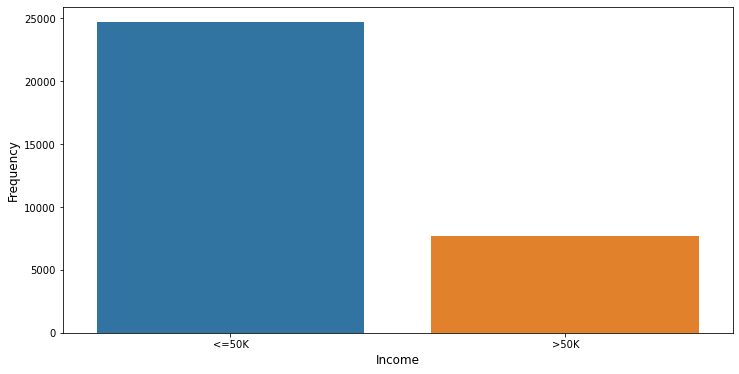

In [65]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = adult_df);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

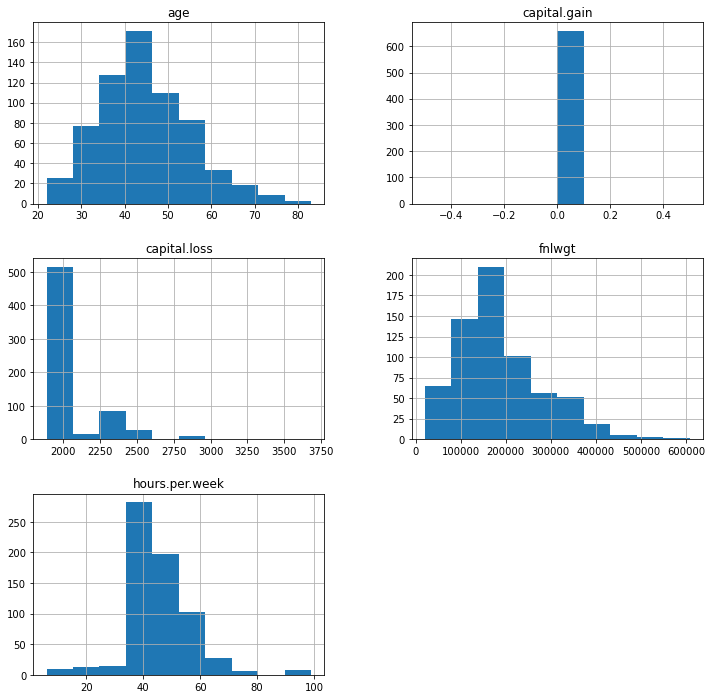

In [66]:
adult_df[(adult_df['capital.loss'] >= 1871) & (adult_df['income'] == '>50K')].hist(figsize = (12,12));